# Text Analysis across Multiple Texts

## Part I: Importing Python Packages or Libraries

1. Before beginning, we need to import some packages.

In [1]:

#import collections





In [2]:
import pathlib
from pathlib import Path
import glob 

textdir = Path("~/shared/RR-workshop-data/state-of-the-union-dataset/txt").expanduser() 
pathlist = sorted(textdir.glob('*.txt')) 

## II. Create a Dataframe of processed texts

**3. DATAFRAMES:** To enable easier analysis of a corpus of texts, we can store info about each in a **dataframe**. A dataframe in Python is a common data structure enabled with the **pandas** library. It is a two-dimensional data table that stores data in rows and columns. 

Run the code below, and then examine what each portion of the code does (see the "#comments").

In [3]:
import pandas as pd   
import nltk
from nltk import RegexpTokenizer  
from nltk.corpus import stopwords
stop = sorted(stopwords.words('english'))

In [4]:
tokenizer = RegexpTokenizer(r'\w+')
#n=50

txtList=[]
pathlist = sorted(textdir.glob('*.txt'))      # .glob only stores the pathlist temporarily (for some reason), so you need to call it again!2
for path in pathlist:
    fn=path.stem                       #stem returns the filename minus the ".txt" (file extension). 
    pres,year=fn.split("_")            # fn = "1794_Washington" becomes year = "1794" and pres = "Washington"
    with open(path,'r') as f:  
        text1 = f.read()                #opens each file and reads it in as "sotu"
    tokens=tokenizer.tokenize(text1)    # tokenizes "sotu"
    numtoks = len(tokens)             # counts the number of tokens in "sotu"
    ltokens_ns = [tok.lower() for tok in tokens if tok not in stop]
    txtList.append([pres, year, numtoks, tokens, ltokens_ns, text1])   #add this info for "sotu" to a running list for all sotu addresses
       

4. We have thus stored information about each text into a list call `txtList`. Now we want to read in this list of information into a dataframe.

In [5]:
colnames=['pres','year','numtoks','tokens', 'ltoks_ns', 'fulltext']
textdf=pd.DataFrame(txtList, columns=colnames)  #places our completed list of SOTU info in a dataframe
textdf.head(10)                                #prints out the first 10 rows of this dataframe (the default value for head() is 5 rows)

,pres,year,numtoks,tokens,ltoks_ns,fulltext
0,Adams,1797,2060,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
1,Adams,1798,2218,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
2,Adams,1799,1505,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
3,Adams,1800,1374,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
4,Adams,1825,9091,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...
5,Adams,1826,7852,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...
6,Adams,1827,7064,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...
7,Adams,1828,7398,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...
8,Arthur,1881,3903,"[To, the, Senate, and, House, of, Representati...","[to, senate, house, representatives, united, s...",To the Senate and House of Representatives of ...
9,Arthur,1882,3157,"[To, the, Senate, and, House, of, Representati...","[to, senate, house, representatives, united, s...",To the Senate and House of Representatives of ...


# [Basic Seaborn Viz: bar chart - word length by year]

<Axes: xlabel='year', ylabel='numtoks'>

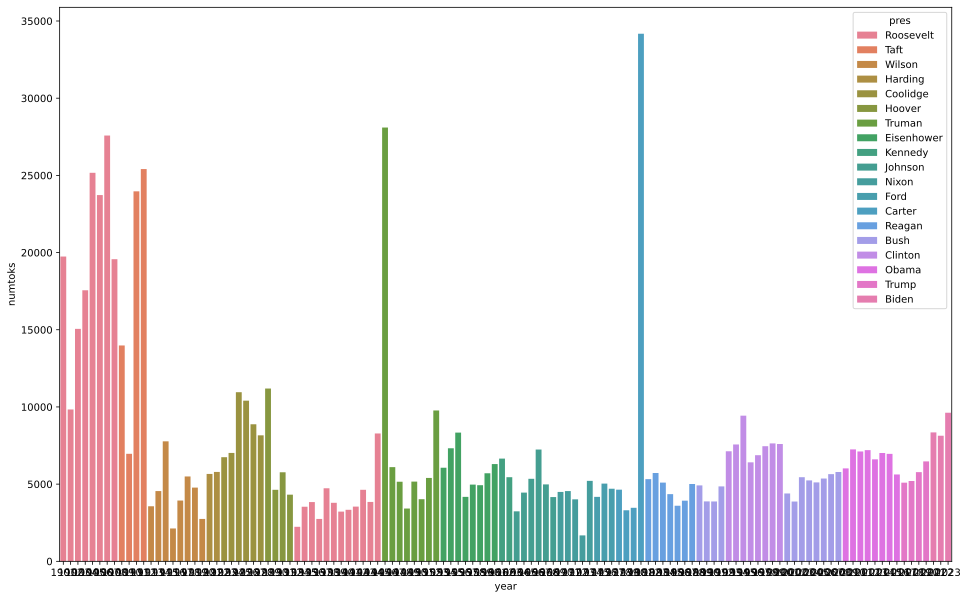

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [16, 10]  #changes default figure size to make larger plots
%config InteractiveShellApp.matplotlib = 'inline'
%config InlineBackend.figure_formats = ['svg']

textdf['year'] = textdf['year'].astype(int)
subdf = textdf[textdf['year'] > 1900]

sns.barplot(subdf, x = "year", y = "numtoks", hue = "pres")

# Term Frequency - Inverse Data Frequency (TFIDF)

<img src = "https://miro.medium.com/max/720/1*qQgnyPLDIkUmeZKN2_ZWbQ.webp" style="width:60%">

Image from Yassine Hamdaoui, ["TF(Term Frequency)-IDF(Inverse Document Frequency) from scratch in python"](https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558) *Towards Data Science (Medium)* (Dec. 9, 2019).

## TF-IDF with Scikit-Learn [MW]

Tf-idf is a method that tries to identify the most distinctively frequent or significant words in a document. 

In this lesson, we’re going to learn how to calculate tf-idf scores using a collection of plain text (.txt) files and the Python library scikit-learn, which has a quick and nifty module called TfidfVectorizer.

In this lesson, we will cover how to:

    Calculate and normalize tf-idf scores for U.S. Inaugural Addresses with scikit-learn


## Breaking Down the TF-IDF Formula [MW]

But first, let’s quickly discuss the tf-idf formula. The idea is pretty simple.

**tf-idf = term_frequency * inverse_document_frequency**

**term_frequency** = number of times a given term appears in document

**inverse_document_frequency** = log(total number of documents / number of documents with term) + 1*****

You take the number of times a term occurs in a document (term frequency). Then you take the number of documents in which the same term occurs at least once divided by the total number of documents (document frequency), and you flip that fraction on its head (inverse document frequency). Then you multiply the two numbers together (term_frequency * inverse_document_frequency).

The reason we take the inverse, or flipped fraction, of document frequency is to boost the rarer words that occur in relatively few documents. Think about the inverse document frequency for the word “said” vs the word “pigeon.” The term “said” appears in 13 (document frequency) of 24 (total documents) Lost in the City stories (24 / 13 –> a smaller inverse document frequency) while the term “pigeons” only occurs in 2 (document frequency) of the 24 stories (total documents) (24 / 2 –> a bigger inverse document frequency, a bigger tf-idf boost).

*There are a bunch of slightly different ways that you can calculate inverse document frequency. The version of idf that we’re going to use is the scikit-learn default, which uses “smoothing” aka it adds a “1” to the numerator and denominator:

**inverse_document_frequency** = log((1 + total_number_of_documents) / (number_of_documents_with_term +1)) + 1

## Part II. Calculate tf-idf [MW]

To calculate tf–idf scores for every word, we’re going to use scikit-learn’s TfidfVectorizer.

4. When you initialize TfidfVectorizer, you can choose to set it with different parameters. These parameters will change the way you calculate tf–idf.

The recommended way to run TfidfVectorizer is with smoothing (smooth_idf = True) and normalization (norm='l2') turned on. These parameters will better account for differences in text length, and overall produce more meaningful tf–idf scores. Smoothing and L2 normalization are actually the default settings for TfidfVectorizer, so to turn them on, you don’t need to include any extra code at all.

Initialize TfidfVectorizer with desired parameters (default smoothing and normalization)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')

5. Run TfidfVectorizer on our text_files

In [8]:
tfidf_vector = tfidf_vectorizer.fit_transform(pathlist)
tfidf_vector


<233x25023 sparse matrix of type '<class 'numpy.float64'>'
	with 361183 stored elements in Compressed Sparse Row format>

6. Make a DataFrame out of the resulting tf–idf vector, setting the “feature names” or words as columns and the titles as rows

In [9]:
text_titles = [path.stem for path in pathlist]
#TfidfVectorizer returns a sparse matrix and that's why we have to call .toarray()  before proceeding.
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())
#warning: get_feature_names will be depreciated; use get_feature_names_out instead
   ##I made this fix in the code above
print(tfidf_df)

              00       000  0000  0001  001  002  003  004  005  006  ...  \
Adams_1797   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Adams_1798   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Adams_1799   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Adams_1800   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Adams_1825   0.0  0.271497   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...          ...       ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
Wilson_1916  0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Wilson_1917  0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Wilson_1918  0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Wilson_1919  0.0  0.023909   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Wilson_1920  0.0  0.204717   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

             zimbabwe  zimbabwean  zinc  zion  zollverein  zone  zones  \
A

In [10]:
tfidf_df.head()

,00,000,0000,0001,001,002,003,004,005,006,...,zimbabwe,zimbabwean,zinc,zion,zollverein,zone,zones,zoological,zooming,zuloaga
Adams_1797,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adams_1798,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adams_1799,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adams_1800,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adams_1825,0.0,0.271497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
tfidf_df['yr'] = tfidf_df.index.str[-4:].astype(int)
tfidf_df['pres'] = tfidf_df.index.str[:-5]
tfidf_df.head()

,00,000,0000,0001,001,002,003,004,005,006,...,zinc,zion,zollverein,zone,zones,zoological,zooming,zuloaga,yr,pres
Adams_1797,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1797,Adams
Adams_1798,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1798,Adams
Adams_1799,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1799,Adams
Adams_1800,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1800,Adams
Adams_1825,0.0,0.271497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1825,Adams


In [12]:
tfidf_21C = tfidf_df.loc[(tfidf_df['yr'] > 1999),: ]
tfidf_21C.shape

(24, 25025)

In [13]:
#make it a long df
tfidf_21C_metadata = tfidf_21C[["pres", "yr"]]
tfidf_21C_values = tfidf_21C.drop(columns = ["pres", "yr"])
tfidf_21C_values.index.name = "textname"
tfidf_21C_values = tfidf_21C_values.reset_index()
tfidf_21C_values.head()


,textname,00,000,0000,0001,001,002,003,004,005,...,zimbabwe,zimbabwean,zinc,zion,zollverein,zone,zones,zoological,zooming,zuloaga
0,Biden_2021,0.0,0.038645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.020148,0.0,0.0,0.0,0.0
1,Biden_2022,0.0,0.035820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Biden_2023,0.0,0.070490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Bush_2001,0.0,0.026712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Bush_2002,0.0,0.020724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [14]:
list(tfidf_21C.columns)

['00',
 '000',
 '0000',
 '0001',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '01',
 '010',
 '011',
 '0111',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '02',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '03',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '04',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '05',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '06',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '07',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '08',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '09',
 '090',
 '0900',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '097',
 '098',
 '099',
 '10',
 '100',
 '1000',
 '100th',
 '101',
 '102',
 '103',
 '103rd',
 '104',
 '104th',
 '105',


In [15]:
tfidf_long =  pd.melt(tfidf_21C_values, id_vars = "textname", var_name = "word", value_name = "tfidf_score", value_vars = list(tfidf_21C_values.drop(columns = ["textname"]).columns))

In [16]:
tfidf_long.head(30)

,textname,word,tfidf_score
0,Biden_2021,00,0.000000
1,Biden_2022,00,0.000000
2,Biden_2023,00,0.000000
3,Bush_2001,00,0.000000
4,Bush_2002,00,0.000000
5,Bush_2003,00,0.000000
6,Bush_2004,00,0.000000
7,Bush_2005,00,0.000000
8,Bush_2006,00,0.000000
9,Bush_2007,00,0.000000


In [17]:
textnames = list(tfidf_long['textname'].unique())

In [18]:
""" for text in textnames:
    dfsub = tfidf_long.loc[tfidf_long['textname'] == text,:]
    dfsub = dfsub.sort_values(by = "tfidf_score", ascending = False).iloc[:15,]
    #print(dfsub.head())
    sns.barplot(dfsub, x = "tfidf_score", y = "word") """

' for text in textnames:\n    dfsub = tfidf_long.loc[tfidf_long[\'textname\'] == text,:]\n    dfsub = dfsub.sort_values(by = "tfidf_score", ascending = False).iloc[:15,]\n    #print(dfsub.head())\n    sns.barplot(dfsub, x = "tfidf_score", y = "word") '

In [19]:
#get top 15 tfidf scores for each text
N = 15
tfidf_long = tfidf_long.sort_values(by = "tfidf_score", ascending=False)
print(tfidf_long.shape)
tfidf_sub = tfidf_long.groupby('textname').head(N).reset_index(drop=True)
#textlist = sorted(list(set(tfidf_sub['textname'])))

(600552, 3)


In [20]:
for i, text in enumerate(textnames):
    onetext_df = tfidf_sub[tfidf_sub['textname'] == text]
    print(onetext_df.head())

      textname       word  tfidf_score
2   Biden_2021       jobs     0.295617
27  Biden_2021    america     0.214516
31  Biden_2021         ve     0.204382
54  Biden_2021   american     0.172958
77  Biden_2021  americans     0.155705
      textname   word  tfidf_score
13  Biden_2022     ve     0.250057
18  Biden_2022     ll     0.242317
37  Biden_2022  folks     0.193564
57  Biden_2022  covid     0.171086
67  Biden_2022  putin     0.163555
       textname   word  tfidf_score
15   Biden_2023  folks     0.248215
19   Biden_2023  going     0.235750
43   Biden_2023     ve     0.184622
50   Biden_2023    let     0.175542
115  Biden_2023   know     0.140238
      textname      word  tfidf_score
12   Bush_2001    budget     0.257806
59   Bush_2001       tax     0.170571
64   Bush_2001  medicare     0.167271
113  Bush_2001    steven     0.140444
135  Bush_2001  americas     0.132538
     textname         word  tfidf_score
21  Bush_2002      america     0.225963
23  Bush_2002  afghanistan     0

C:\Users\F0040RP\AppData\Local\Temp\ipykernel_41536\2623852176.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


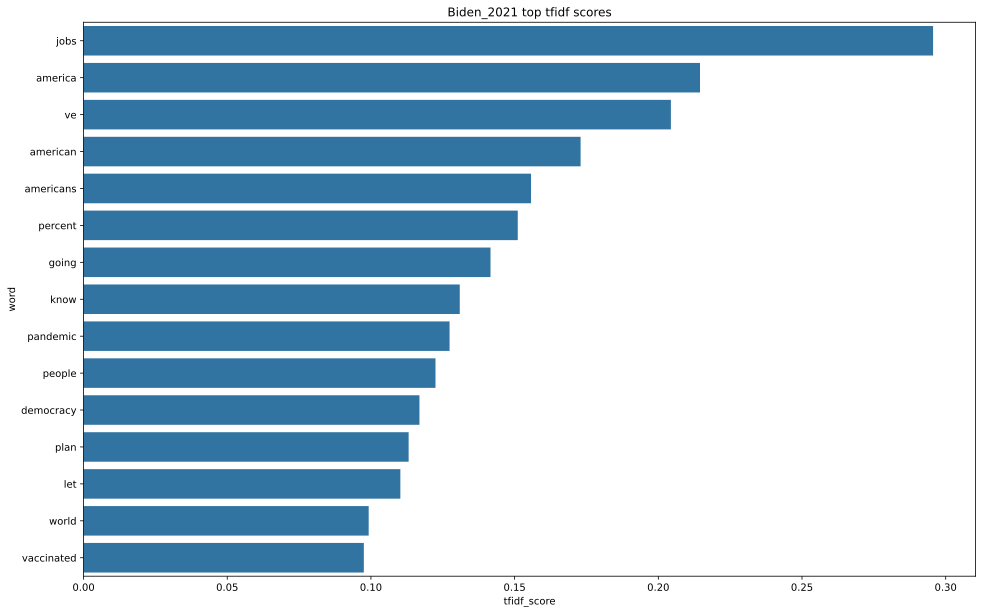

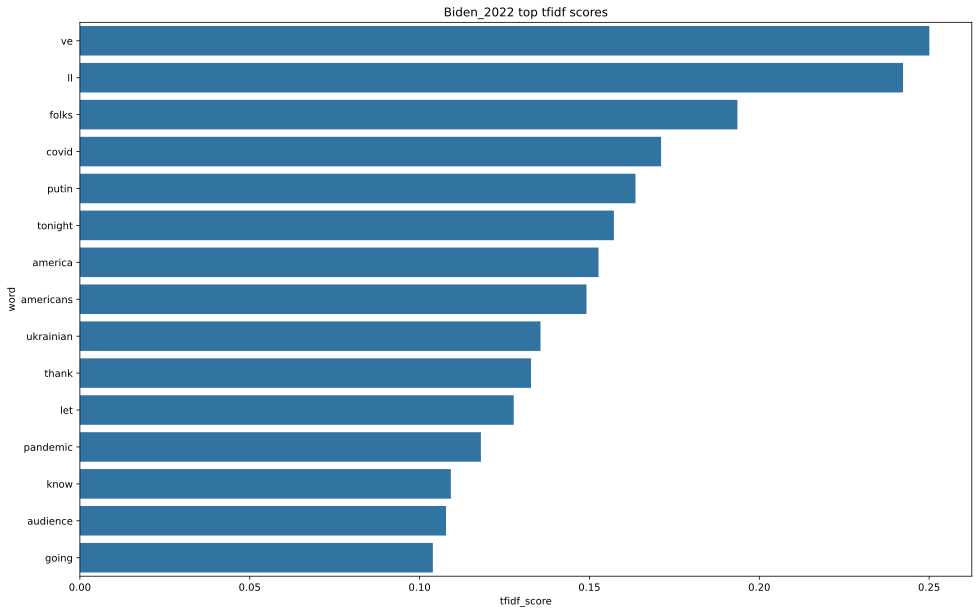

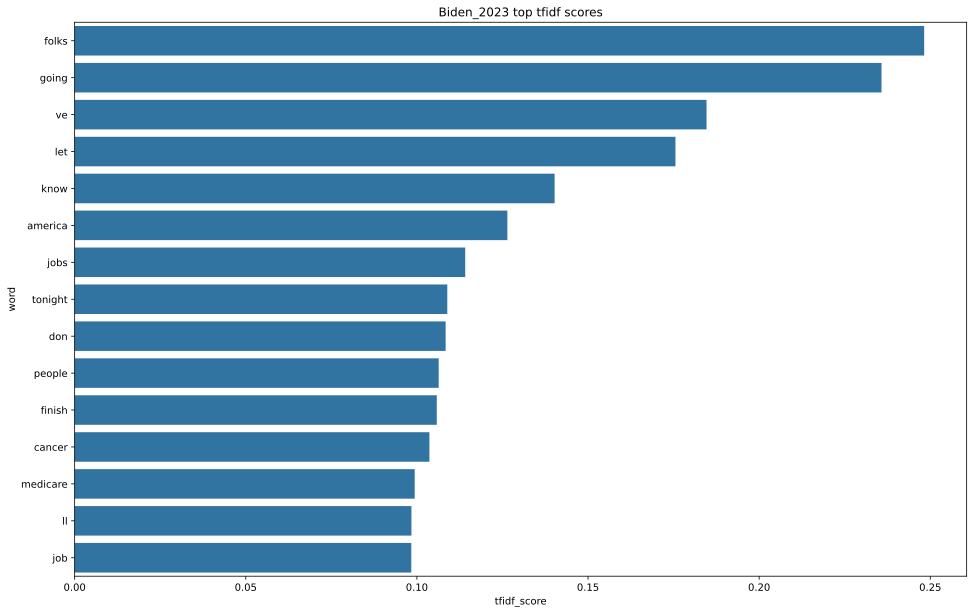

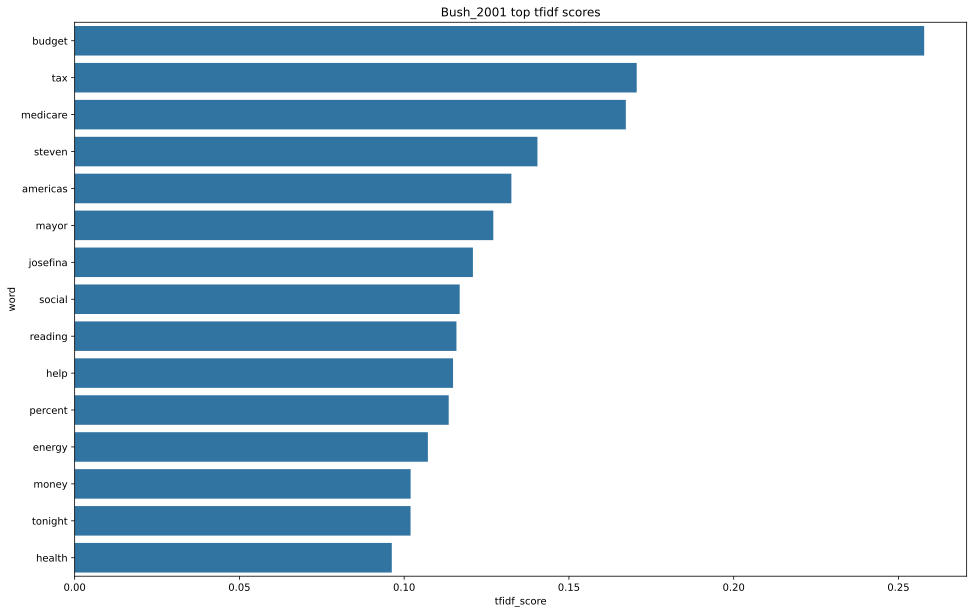

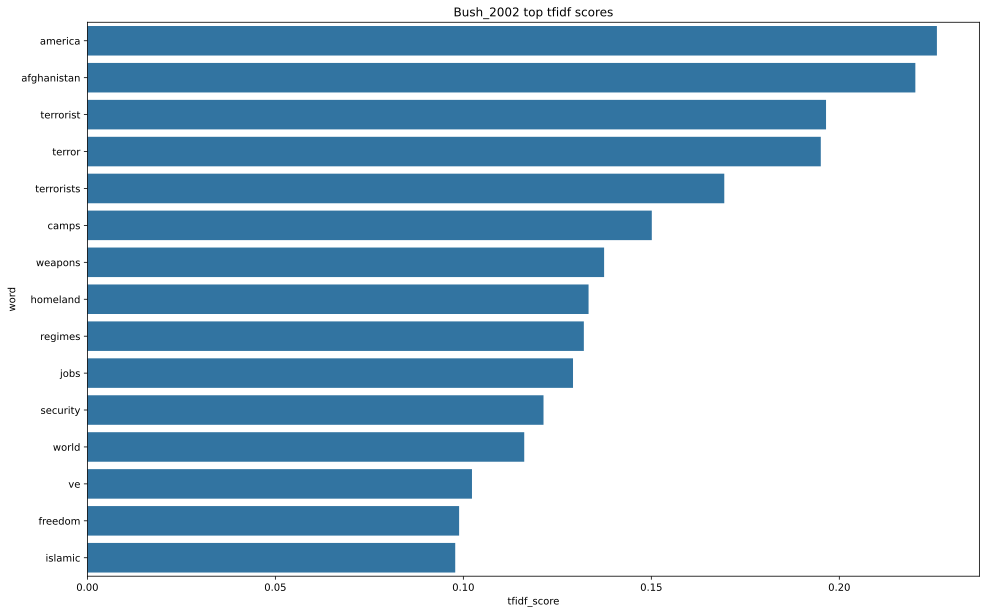

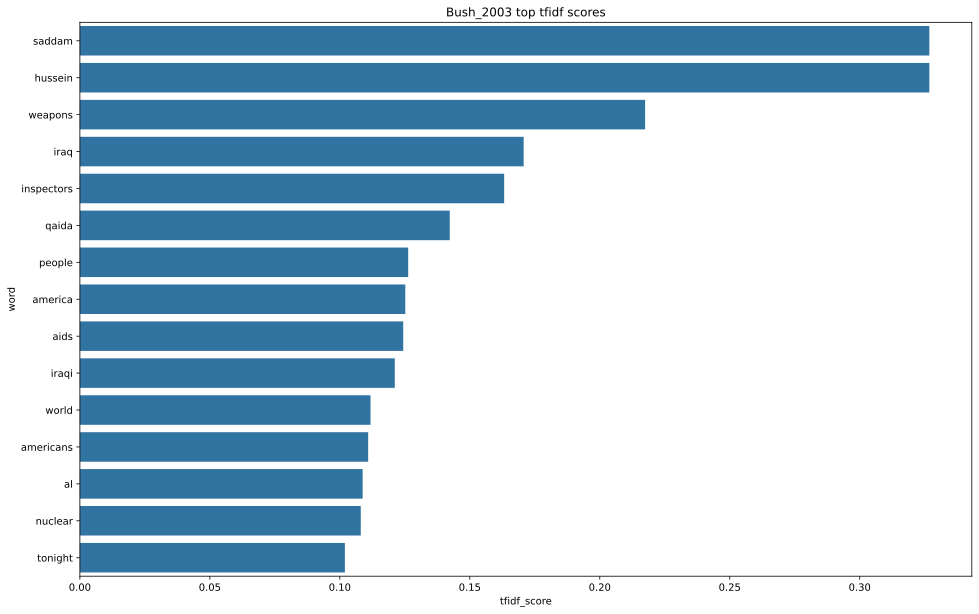

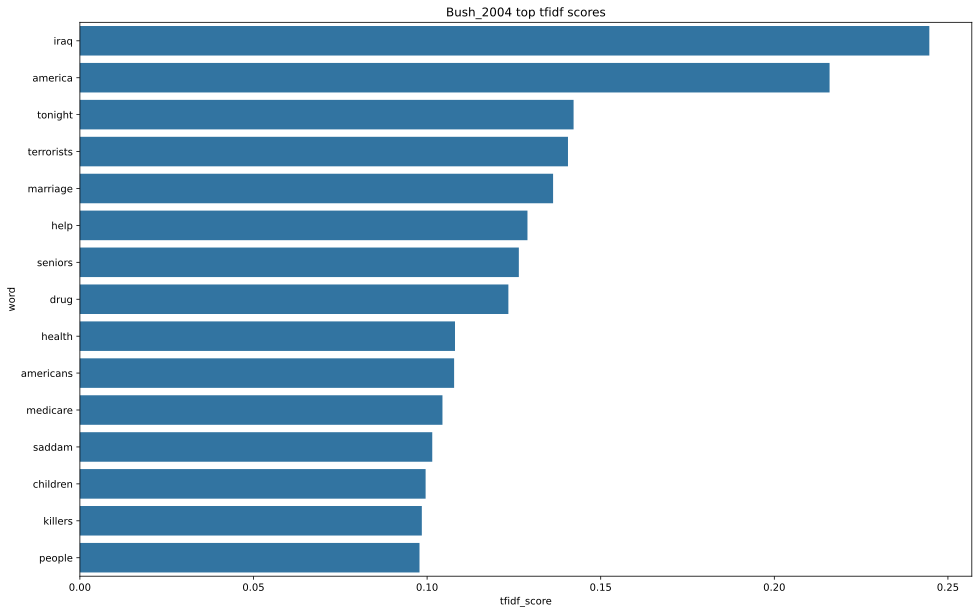

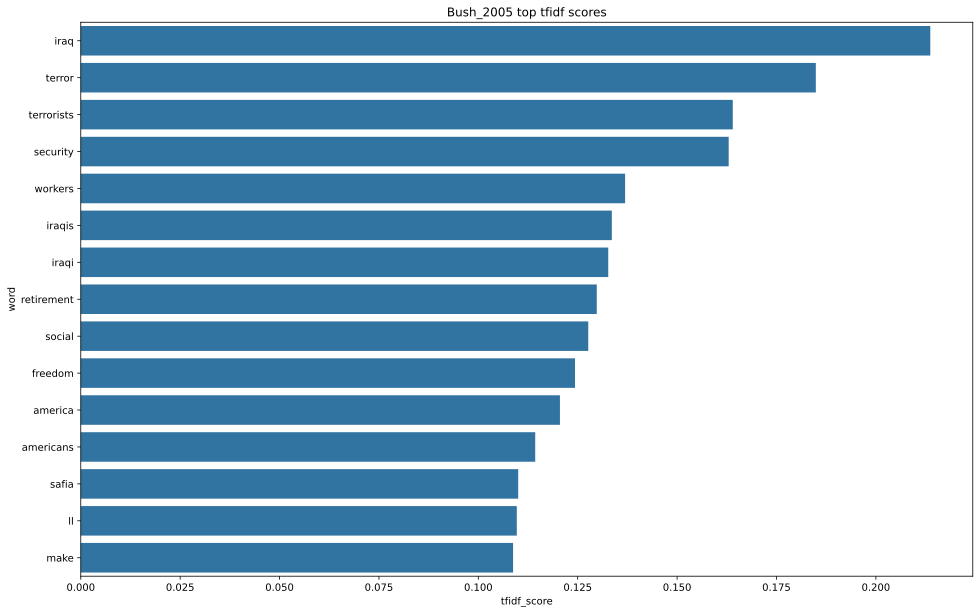

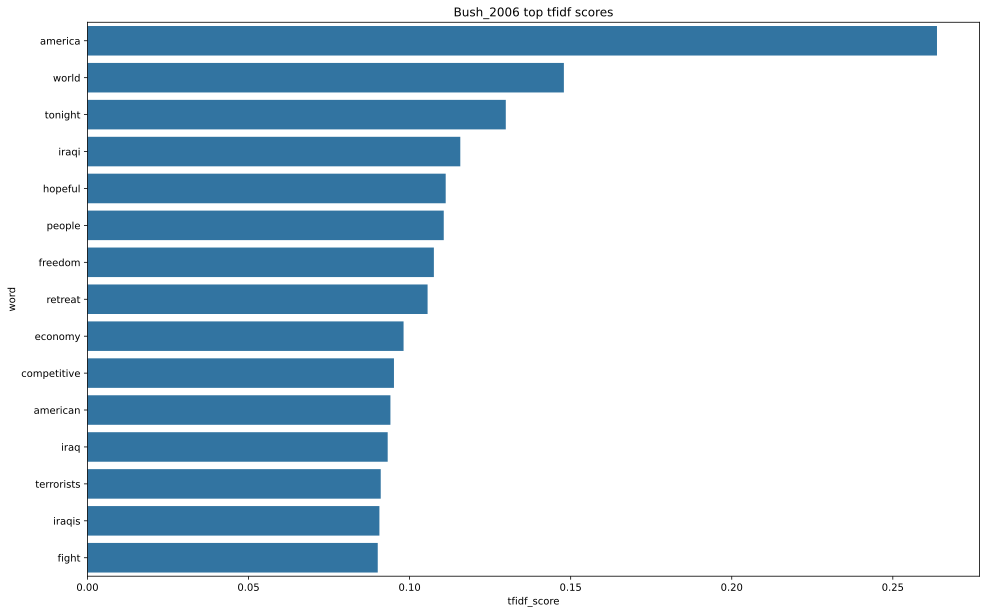

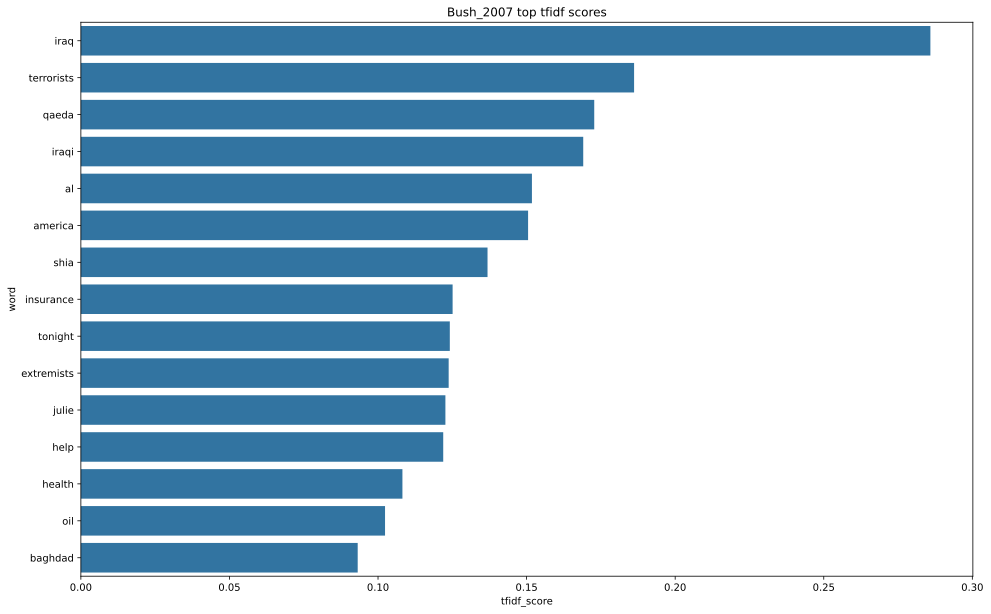

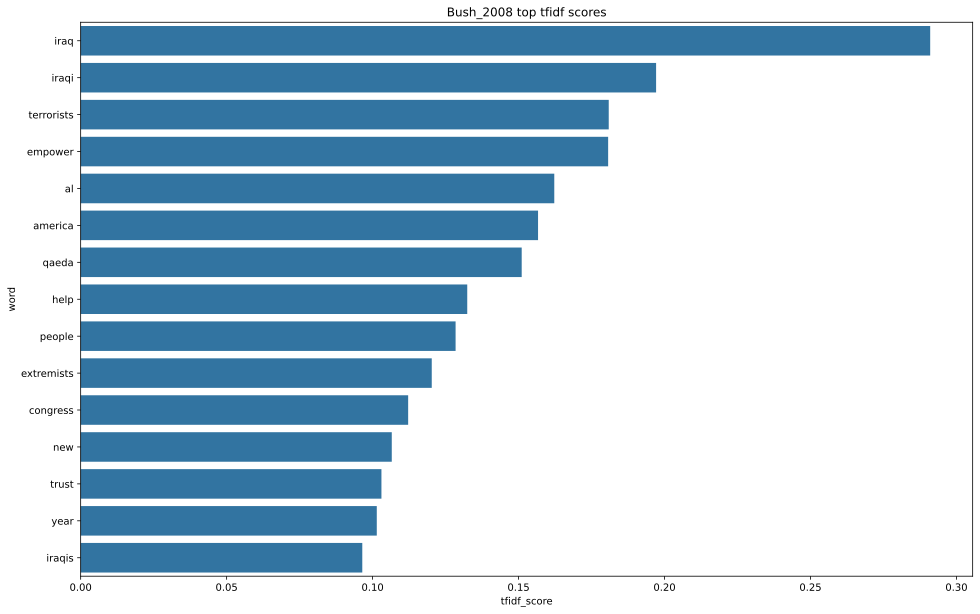

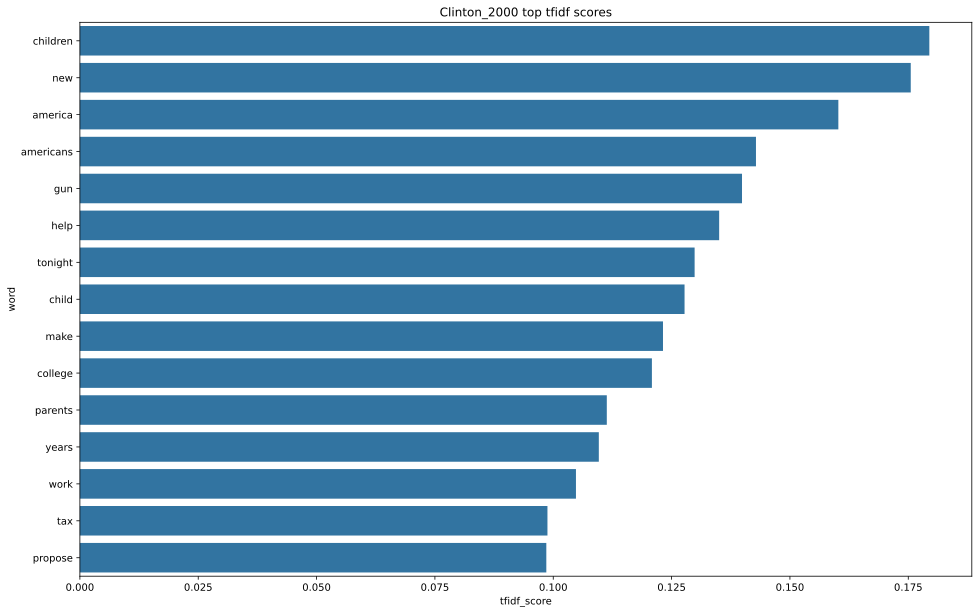

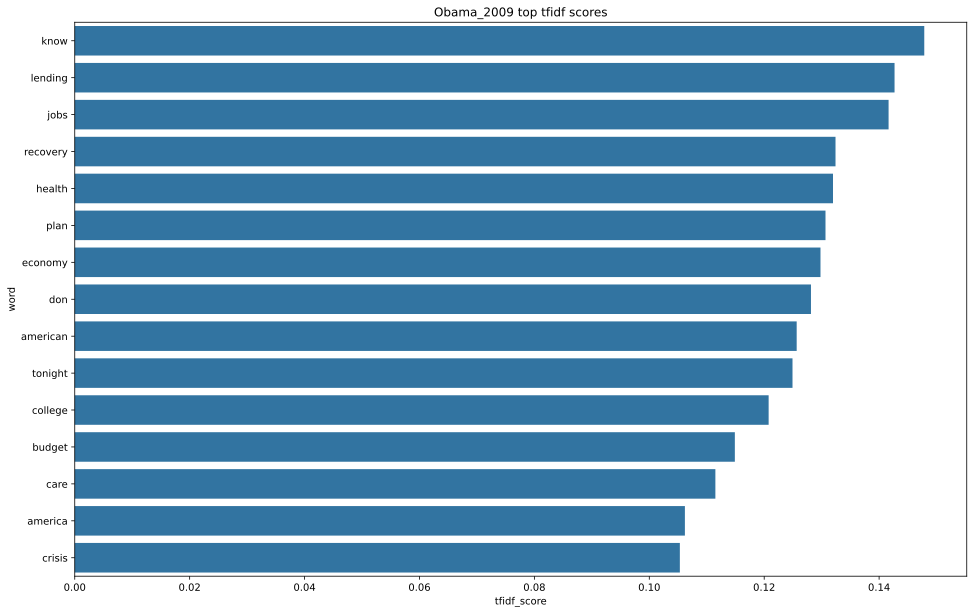

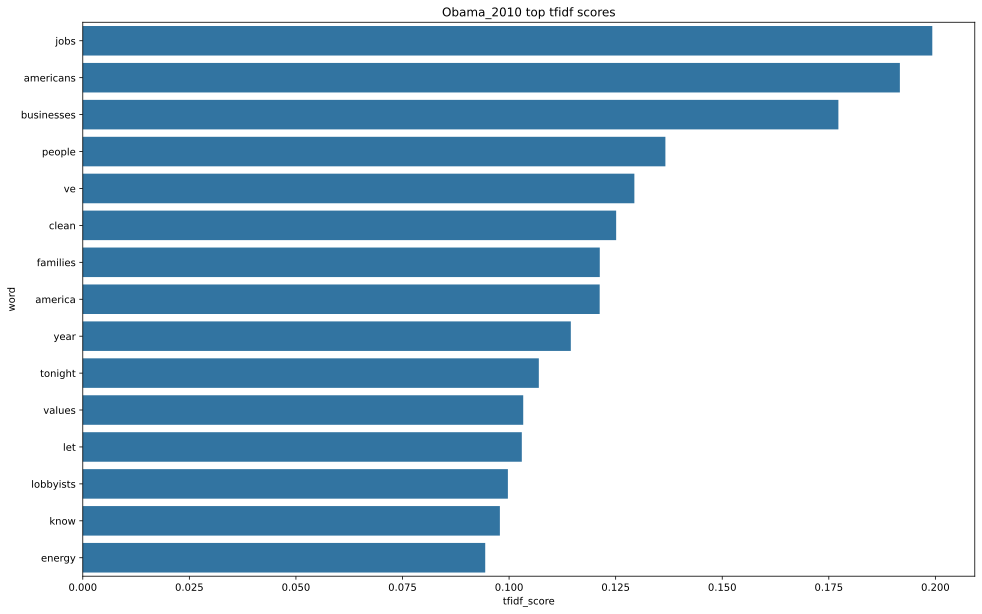

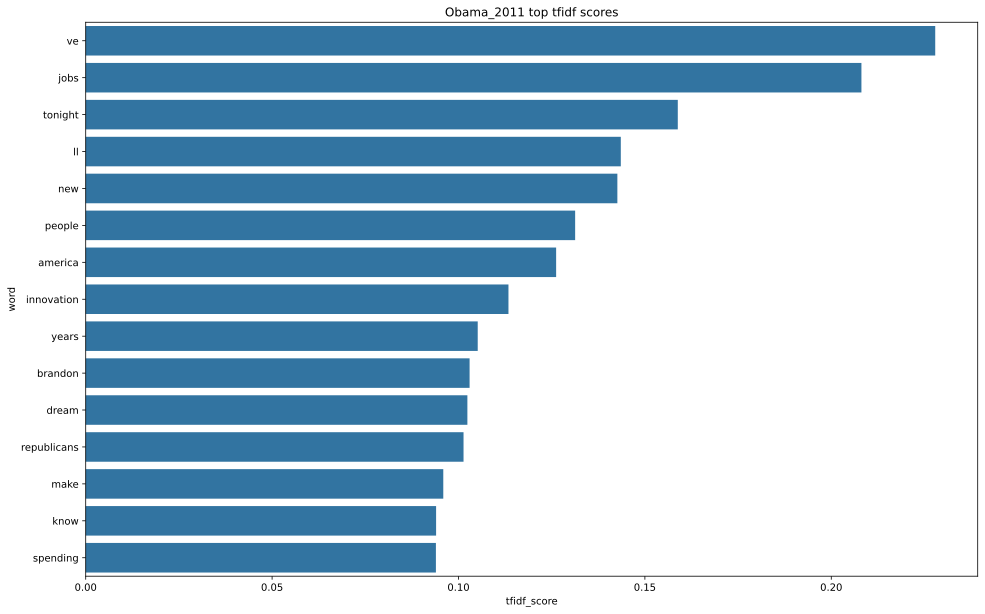

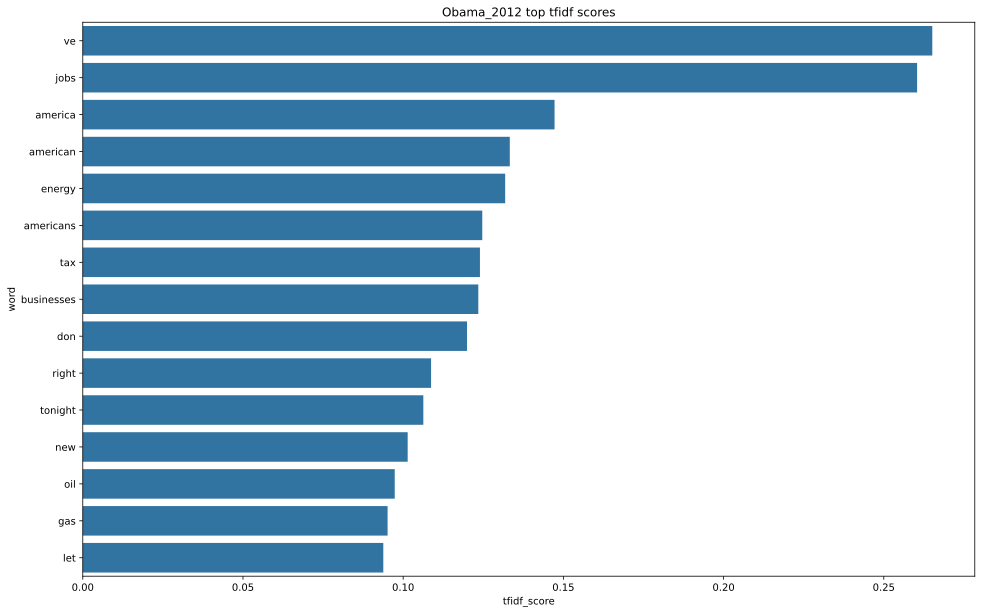

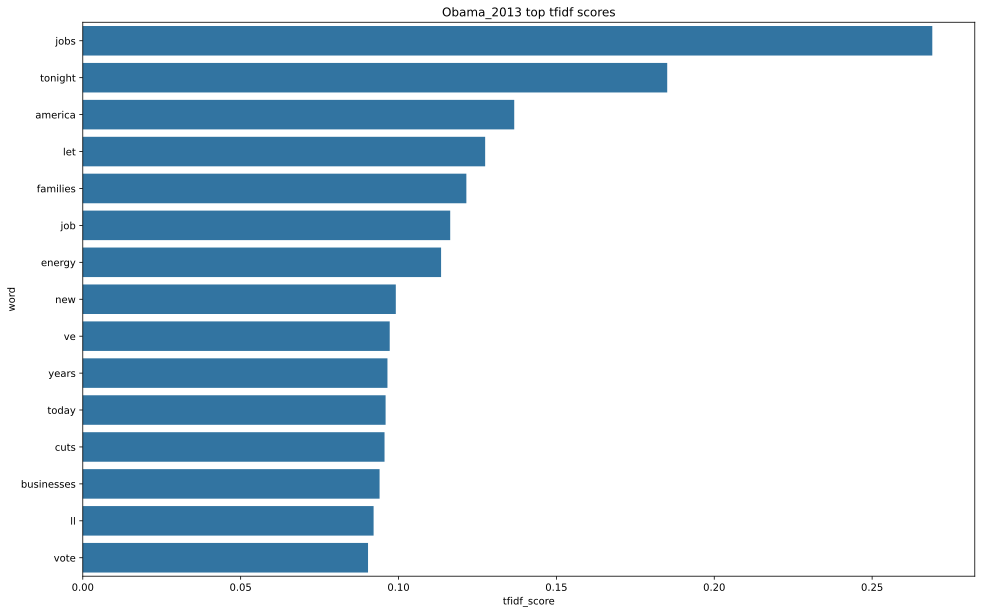

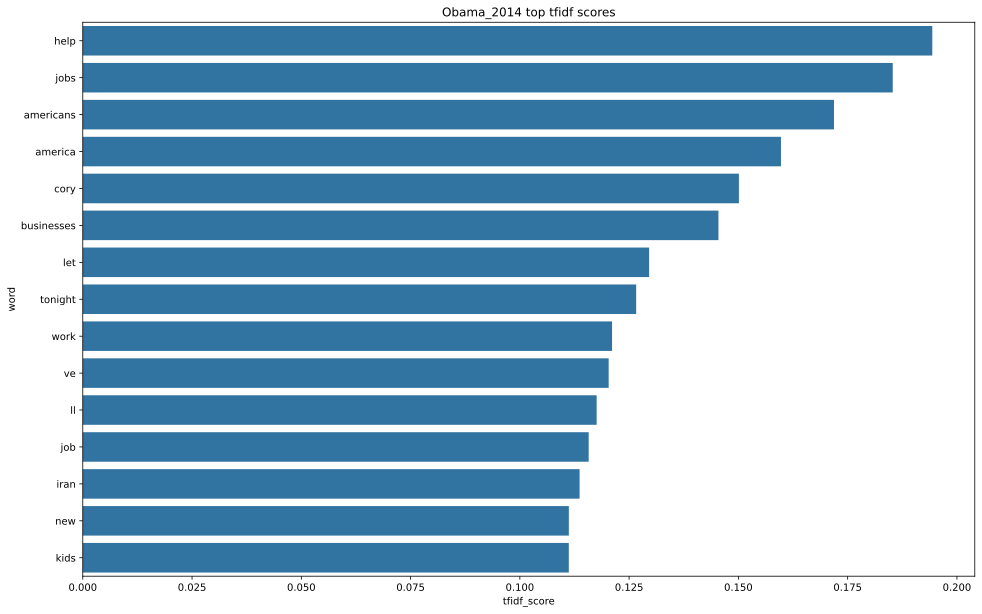

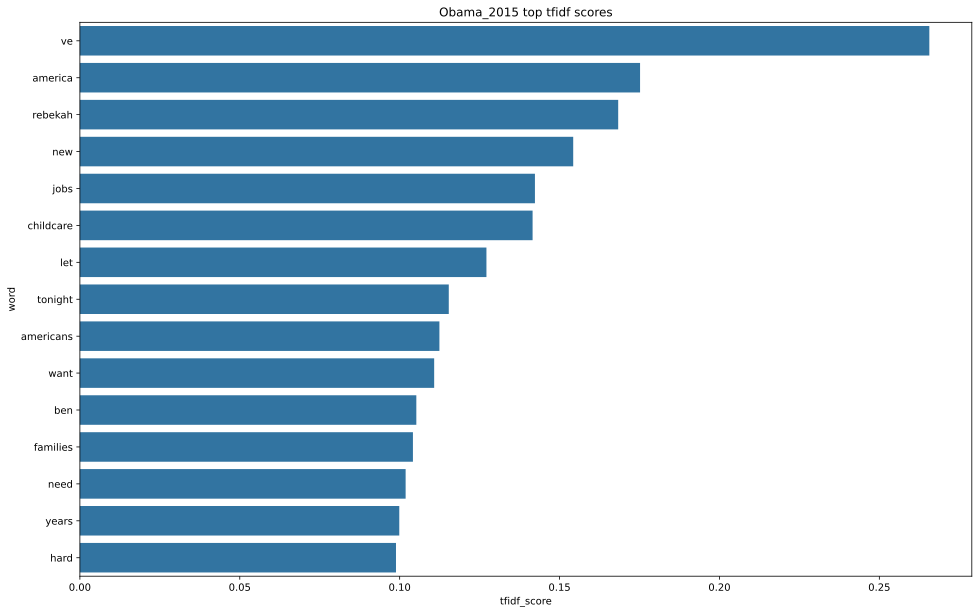

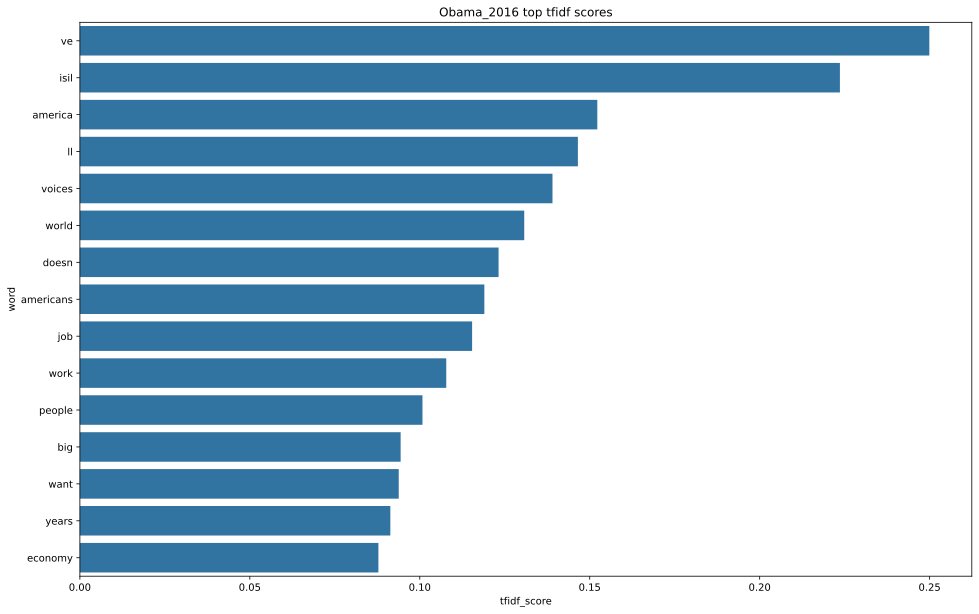

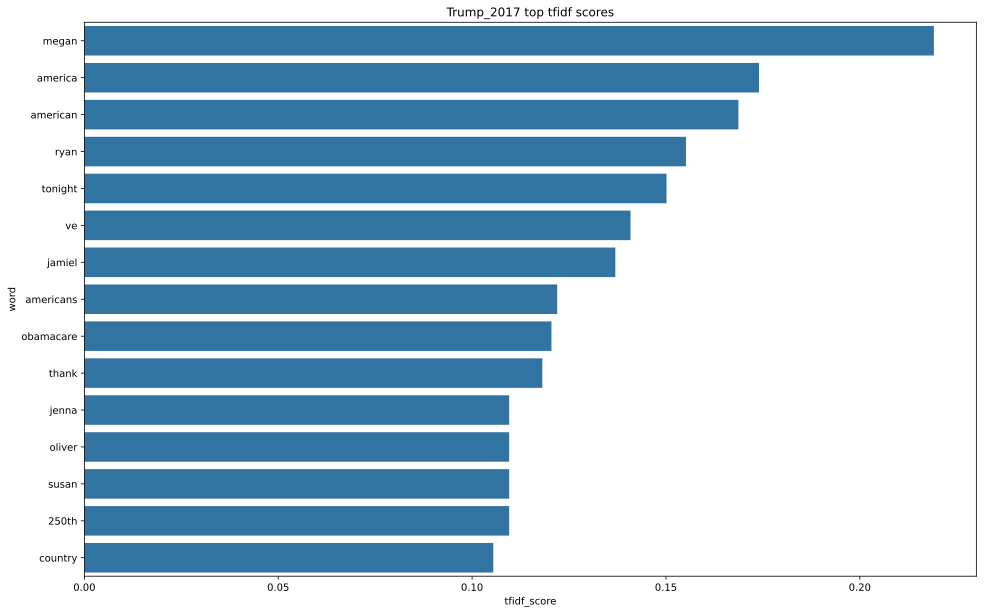

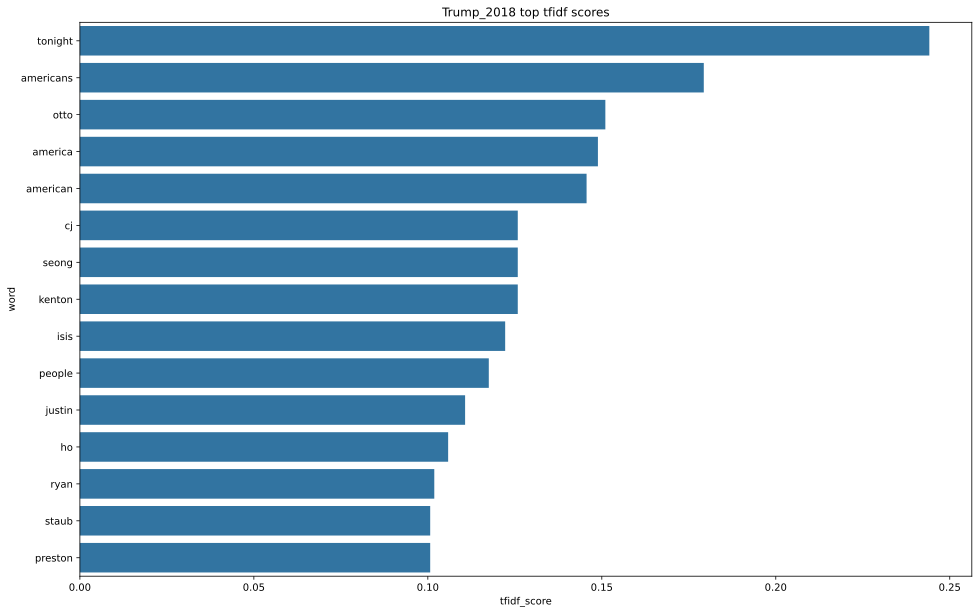

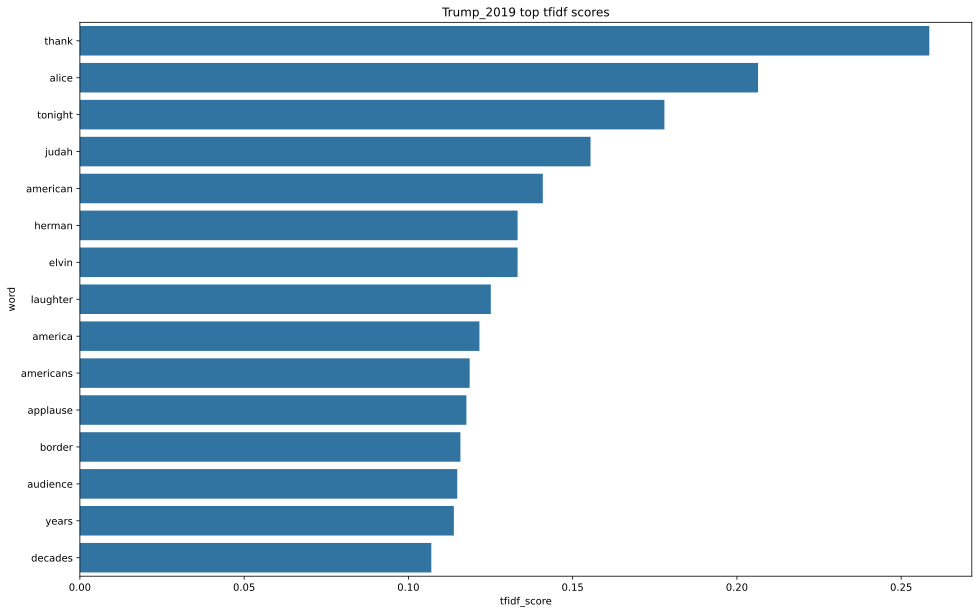

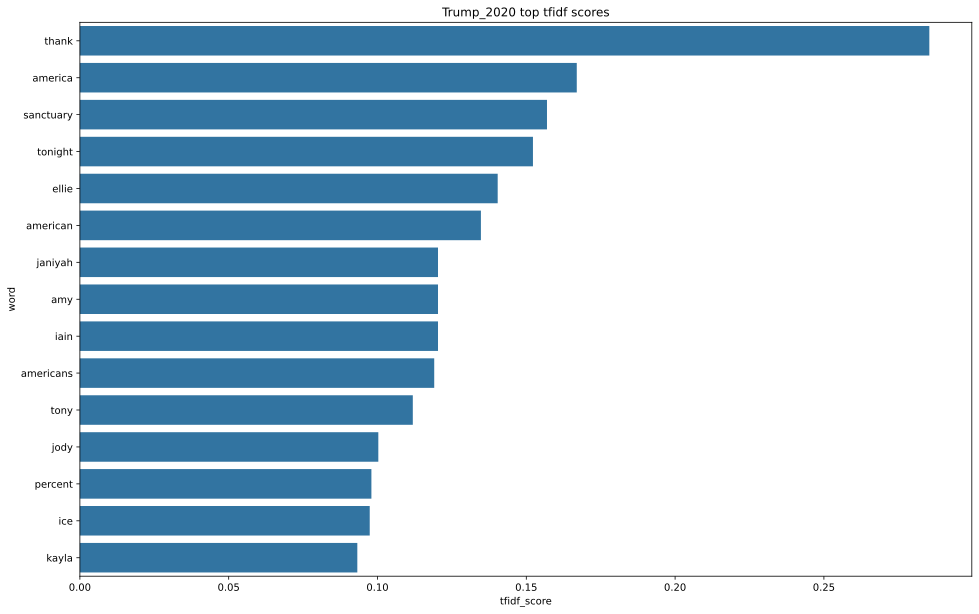

In [21]:
'''
g = sns.FacetGrid(tfidf_sub, row="textname", hue="textname",
                  palette="Set3", aspect=2)
g.map(sns.barplot, 'tfidf_score', 'word')
'''

for i, text in enumerate(textnames):
    onetext_df = tfidf_sub[tfidf_sub['textname'] == text]
    plt.figure(i)
    sns.barplot(onetext_df, x = "tfidf_score", y = "word")
    plt.title(text +' top tfidf scores')
 
    

## [tfidf rankings - see https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf]

# [some sort of visualization of tfidf??]

# [tfidf for ngrams]

Goal: recreate analysis similar to that in two articles on (fivethirtyeight.com):"
+ Milo Beckman, ["These are the Phrases Each GOP Candidate Repeats the Most"](https://fivethirtyeight.com/features/these-are-the-phrases-each-gop-candidate-repeats-most/) (Mar 10, 2016).
+ Nathaniel Rakich and Dhrumil Mehta, ["The State of the State of the States"](https://fivethirtyeight.com/features/these-are-the-phrases-each-gop-candidate-repeats-most/) (June 13, 2019).

*Question: keep stopwords in? i.e. "war terror" vs. "war on terror"*

In [22]:
tfidf_vectorizer24 = TfidfVectorizer(input='filename', stop_words='english', ngram_range = (2,4))
tfidf_vector24 = tfidf_vectorizer24.fit_transform(pathlist)
tfidf24 = pd.DataFrame(tfidf_vector24.toarray(), index=text_titles, columns=tfidf_vectorizer24.get_feature_names_out())
tfidf24.shape

(233, 2139862)

In [23]:
tfidf24['yr'] = tfidf24.index.str[-4:].astype(int)
tfidf24['pres'] = tfidf24.index.str[:-5]
tfidf24_21C = tfidf24.loc[(tfidf24['yr'] > 1999),: ]
tfidf24_21C_values = tfidf24_21C.drop(columns = ["pres", "yr"])
tfidf24_21C_values.index.name = "textname"
tfidf24_21C_values = tfidf24_21C_values.reset_index()
tfidf24_21C_values.head()

,textname,00 085,00 085 005,00 085 005 33,00 107,00 107 000,00 107 000 68,00 12,00 12 844,00 12 844 122,...,zuloaga earnestly resisted parts,zuloaga recognized,zuloaga recognized entire,zuloaga recognized entire diplomatic,zuloaga restored,zuloaga restored previous,zuloaga restored previous position,zuloaga usurper,zuloaga usurper turn,zuloaga usurper turn soon
0,Biden_2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Biden_2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Biden_2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bush_2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bush_2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#(tfidf14_21C_values.max(numeric_only = True) > 0.02)

In [25]:
#(tfidf14_21C_values.max(numeric_only = True) > 0.02)

In [26]:
#tfidf14_21C_values.loc[: ,(tfidf14_21C_values.max(numeric_only = True) > 0.02)]

In [27]:
tfidf24_21C_values.dtypes

textname                               object
00 085                                float64
00 085 005                            float64
00 085 005 33                         float64
00 107                                float64
                                       ...   
zuloaga restored previous             float64
zuloaga restored previous position    float64
zuloaga usurper                       float64
zuloaga usurper turn                  float64
zuloaga usurper turn soon             float64
Length: 2139863, dtype: object

In [28]:
print(tfidf24_21C_values.shape)
tfidf24_21C_values.drop(columns = tfidf24_21C_values.loc[:, tfidf24_21C_values.dtypes == "float64"].columns[(tfidf24_21C_values.max(numeric_only = True) < 0.02)], inplace = True)
tfidf24_21C_values.shape

(24, 2139863)


(24, 1042)

In [29]:
#tfidf14_21C_values.iloc[:, 1:].columns

In [30]:
#tfidf14_21C_values.iloc[:, 1:].ge(0.02)

In [31]:
#tfidf14_21C_values.iloc[:, 1:].columns

In [32]:
#tfidf14_21C_values.iloc[:, 1:].columns[tfidf14_21C_values.iloc[:, 1:].ge(0.02)]

In [33]:

#tfidf14_21C_values.drop(columns = tfidf14_21C_values.iloc[:, 1:].columns[tfidf14_21C_values.iloc[:, 1:].ge(0.02)], inplace = True)

In [34]:
tfidf24_long =  pd.melt(tfidf24_21C_values, id_vars = "textname", var_name = "word", value_name = "tfidf_score", value_vars = list(tfidf24_21C_values.drop(columns = ["textname"]).columns))

In [35]:
textnames = list(tfidf24_long['textname'].unique())
N = 15
tfidf24_long = tfidf24_long.sort_values(by = "tfidf_score", ascending=False)
print(tfidf24_long.shape)
tfidf24_sub = tfidf24_long.groupby('textname').head(N).reset_index(drop=True)
#textlist = sorted(list(set(tfidf14_sub['textname'])))

(24984, 3)


In [36]:
for i, text in enumerate(textnames):
    onetext_df = tfidf24_sub[tfidf24_sub['textname'] == text]
    print(onetext_df.head())

      textname                word  tfidf_score
1   Biden_2021           jobs plan     0.120167
2   Biden_2021  american jobs plan     0.101679
12  Biden_2021       american jobs     0.073464
20  Biden_2021            100 days     0.064705
71  Biden_2021            covid 19     0.042966
      textname                  word  tfidf_score
11  Biden_2022              covid 19     0.077489
19  Biden_2022      audience members     0.065180
34  Biden_2022           thank thank     0.054752
40  Biden_2022       american rescue     0.051659
41  Biden_2022  american rescue plan     0.051659
       textname                word  tfidf_score
9    Biden_2023      let finish job     0.078411
10   Biden_2023          let finish     0.078411
17   Biden_2023          finish job     0.067990
110  Biden_2023       mental health     0.037673
139  Biden_2023  republican friends     0.035256
      textname             word  tfidf_score
8    Bush_2001  social security     0.078916
21   Bush_2001       tax rel

In [37]:
tfidf24_sub = tfidf24_sub.sort_values(by = "tfidf_score", ascending = False)
tfidf24_sub.head(20)

,textname,word,tfidf_score
0,Bush_2003,saddam hussein,0.165067
1,Biden_2021,jobs plan,0.120167
2,Biden_2021,american jobs plan,0.101679
3,Bush_2005,social security,0.086756
4,Obama_2009,recovery plan,0.084294
5,Obama_2009,health care,0.081991
6,Bush_2006,hopeful society,0.079473
7,Bush_2007,al qaeda,0.079357
8,Bush_2001,social security,0.078916
10,Biden_2023,let finish,0.078411


# [produce some sort of results]

In [38]:
tfidf24_sub.textname

0       Bush_2003
1      Biden_2021
2      Biden_2021
3       Bush_2005
4      Obama_2009
          ...    
355    Obama_2014
356    Obama_2014
357    Obama_2014
358    Obama_2014
359    Obama_2014
Name: textname, Length: 360, dtype: object

<BarContainer object of 18 artists> Bush_2003


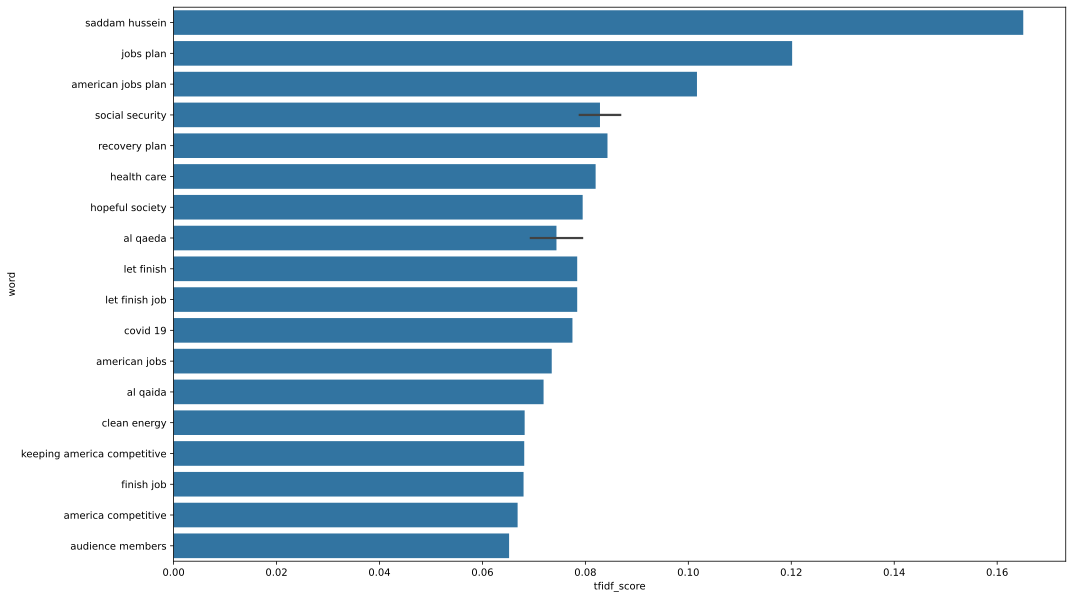

In [39]:
ax = sns.barplot(tfidf24_sub.head(20), x = "tfidf_score", y = "word")

for container, textname in zip(ax.containers, tfidf24_sub.textname):
    print(container, textname)
    #ax.bar_label(container, labels=[textname, textname])

# [Activity: Read in a different corpus, create a dataframe of info from this corpus, create a summary graphic, perform tfidf]